# Grafos con NetworkX

https://cienciadedatos.net/documentos/pygml01-introduccion-grafos-redes-python

NetworkX permite crear redes de manera manual, añadiendo los nodos y ejes uno por uno o desde un archivo o un DataFrame que contenga las conexiones.

## Instalación networkx 3.4.2
pip install networkx

In [3]:
pip show networkx

Name: networkx
Version: 3.3
Summary: Python package for creating and manipulating graphs and networks
Home-page: https://networkx.org/
Author: 
Author-email: Aric Hagberg <hagberg@lanl.gov>
License: 
Requires: 
Required-by: intake, scikit-image
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Librerías
# ======================================================================================
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## Creación desde un DataFrame
Para crear un grafo a partir de un dataframe de pandas, la información tiene que estar estructurada de tal forma que una columna represente el incio de cada eje y otra el destino. Por ejemplo, para representar que existen dos nodos ("A" y "B") conectados entre si, se necesita una fila que contenga el valor "A" en una columna y "B" en otra. Esta información es suficiente para que se creen los dos nodos y la conexión entre ambos.

In [8]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones = pd.DataFrame(
    {
        "inicio": ["A", "B", "C"],
        "fin": ["C", "C", "D"],
    }
)
conexiones

,inicio,fin
0,A,C
1,B,C
2,C,D


En la función from_pandas_edgelist se indica la columna de origen y destino (para grafos no dirigidos, se elige un origen indistintamente).

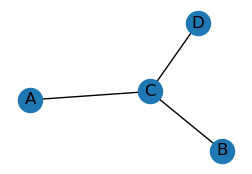

In [11]:
# Crear un grafo a partir de un Dataframe
# ======================================================================================
#Librerpia que genera la vizualización.(tamaño de la figura)
fig, ax = plt.subplots(figsize=(3,2)) 
#Crear el grafo a partir de las conexiones en el DF: nx.from_pandas_edgelist(nombre_df, donde_inicia, donde_termina)
G = nx.from_pandas_edgelist(conexiones, source="inicio", target="fin") 
#Dibuja la conexión draw(partir_de_G, estiquetas, inf_figura)
nx.draw(G, with_labels=True, ax=ax)

In [13]:
# matriz de adjacencia
adjM = nx.adjacency_matrix(G) #Se pasa el grafo para generar la matriz
adjM = adjM.todense()
adjM

array([[0, 1, 0, 0],
       [1, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

## Creación desde un DataFrame

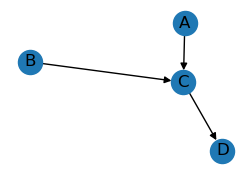

In [16]:
# Crear un grafo dirigido a partir de un Dataframe
# ======================================================================================
G2 = nx.from_pandas_edgelist(
    conexiones,
    source = "inicio",
    target = "fin",
    create_using = nx.DiGraph
)
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G2, with_labels=True, ax=ax)

In [18]:
# Matrix de adyacencia
adjM = nx.adjacency_matrix(G2).todense()
adjM

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 0]])

## Caso 2

In [21]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones2 = pd.DataFrame(
    {
        "inicio": ["A", "B", "C","D"],
        "fin": ["C", "C", "D","D"],
    }
)
conexiones2

,inicio,fin
0,A,C
1,B,C
2,C,D
3,D,D


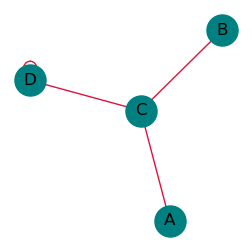

In [41]:
# Crear un grafo a partir de un Dataframe
# Cambio color de los nodos y ejes
# ======================================================================================
fig, ax = plt.subplots(figsize=(3,3))
G3 = nx.from_pandas_edgelist(conexiones2, source="inicio", target="fin")
nx.draw(G3, with_labels=True, ax=ax, node_color="teal", edge_color="crimson",node_size=500)

In [25]:
# Matrix de adyacencia
adjM2 = nx.adjacency_matrix(G3).todense()
adjM2

array([[0, 1, 0, 0],
       [1, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1]])

## Información del grafo

In [48]:
print("Número de nodos:", G.number_of_nodes())
print("Número de enlaces:", G.number_of_edges())

Número de nodos: 4
Número de enlaces: 3


### Vecinos y grados

In [51]:
nodo_id = "A"
vecinos = list(G3.neighbors(nodo_id))
print("Vecinos del nodo {nodo_id}:", vecinos)

grado = G3.degree[nodo_id]
print("Grado del nodo {nodo_id}:", grado)

Vecinos del nodo {nodo_id}: ['C']
Grado del nodo {nodo_id}: 1


In [53]:
nodo_id = "C"
vecinos = list(G3.neighbors(nodo_id))
print("Vecinos del nodo {nodo_id}:", vecinos)

grado = G3.degree[nodo_id]
print("Grado del nodo {nodo_id}:", grado)

Vecinos del nodo {nodo_id}: ['A', 'B', 'D']
Grado del nodo {nodo_id}: 3


In [55]:
nodo_id = "D"
vecinos = list(G3.neighbors(nodo_id))
print("Vecinos del nodo {nodo_id}:", vecinos)

grado = G3.degree[nodo_id]
print("Grado del nodo {nodo_id}:", grado)

Vecinos del nodo {nodo_id}: ['C', 'D']
Grado del nodo {nodo_id}: 3


# Eulerian circuit in an undirected graph

No es circuito de Euler porque los vértices no son pares

In [61]:
nx.is_eulerian(G3)

False

No es circuito de Euler porque los vértices no son pares

In [65]:
nx.is_eulerian(G) # No es circuito de Euler porque los vértices no son pares

False

## Caso 3

In [ ]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones3 = pd.DataFrame(
    {
        "inicio": ["0", "1", "2","3","1"],
        "fin": ["3", "2", "3","0","0"],
    }
)
conexiones3

,inicio,fin
0,0,3
1,1,2
2,2,3
3,3,0
4,1,0


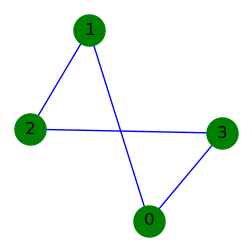

In [69]:
# Crear un grafo a partir de un Dataframe
# Cambio color de los nodos y ejes
# ======================================================================================
fig, ax = plt.subplots(figsize=(3,3))
G4 = nx.from_pandas_edgelist(conexiones3, source="inicio", target="fin")
nx.draw(G4, with_labels=True, ax=ax, node_color="green", edge_color="blue",node_size=500)

In [75]:
nx.is_eulerian(G4)

True

In [81]:
list(nx.eulerian_circuit(G4))

[('0', '1'), ('1', '2'), ('2', '3'), ('3', '0')]

In [85]:
#To get the sequence of vertices in an Eulerian circuit:
[u for u, v in nx.eulerian_circuit(G4)]

['0', '1', '2', '3']